# Final Project

## 1. Scope the Project

The plan is to use a supervised learning technique to predict which customers are most likely to cancel their subscription using **the past three months of customer data which includes subscription and listening history**.

## 2. Gather Data

Read the following files into Python:
* Customer data: *maven_music_customers.csv*
* Listing history: *maven_music_listening_history.xlsx*

In [13]:
# Read in the customer data
import pandas as pd

# Load the customer data from the uploaded CSV file
customer_data_path = 'maven_music_customers.csv'
customer_data = pd.read_csv(customer_data_path)

# Display the first few rows of the data to confirm successful loading
customer_data.head()



,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,3/13/23,Basic (Ads),$2.99,NaN,NaN
1,5002,Aria Keys,Email: melodious.aria@email.edu,3/13/23,NaN,$2.99,NaN,NaN
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,3/13/23,NaN,$2.99,NaN,6/1/23
3,5267,Rock Bassett,Email: groovy.rock@email.com,3/20/23,Basic (Ads),$2.99,NaN,NaN
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,3/20/23,NaN,$2.99,NaN,NaN


In [5]:
# Read in the listening history
# Load the listening history from the uploaded Excel file
listening_history_path = 'maven_music_listening_history.xlsx'
listening_history = pd.read_excel(listening_history_path)

# Display the first few rows of the listening history data to confirm successful loading
listening_history.head()


,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song
2,5001,100520,3,103,Song
3,5001,100520,4,104,Song
4,5001,100520,5,105,Song


In [ ]:
# Hint: Where might you find listening history data beyond the ID's?


In [7]:
# Read in the audio data
audio = pd.read_excel('maven_music_listening_history.xlsx', sheet_name=1)
audio.head()


,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1
1,Song-102,Unbreakable Beat,Pop,2
2,Song-103,Sunset Boulevard,Pop Music,5
3,Song-104,Glowing Hearts,Pop Music,10
4,Song-105,Pop Rocks,Pop Music,52


In [8]:
# Read in the session data
sessions = pd.read_excel('maven_music_listening_history.xlsx', sheet_name=2)
sessions.head()

,Session ID,Session Log In Time
0,100520,2023-03-13 18:29:00
1,100522,2023-03-13 22:15:00
2,100525,2023-03-14 10:01:00
3,100527,2023-03-13 14:14:00
4,100538,2023-03-21 12:23:00


## 3. Clean Data

### a. Convert Data Types

Check the data types of the data in the tables and convert to numeric and datetime values as necessary.

In [17]:
# Check the data types

customer_data.dtypes


Customer ID           int64
Customer Name        object
Email                object
Member Since         object
Subscription Plan    object
Subscription Rate    object
Discount?            object
Cancellation Date    object
dtype: object

In [18]:
# Check the listening history data types -- looks good
listening_history.dtypes

Customer ID     int64
Session ID      int64
Audio Order     int64
Audio ID        int64
Audio Type     object
dtype: object

In [19]:
# Check the audio data types -- looks good
audio.dtypes

ID            object
Name          object
Genre         object
Popularity     int64
dtype: object

In [20]:
# Check the session data types -- looks good
sessions.dtypes

Session ID                      int64
Session Log In Time    datetime64[ns]
dtype: object

In [22]:
customer_data.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,3/13/23,Basic (Ads),$2.99,NaN,NaN
1,5002,Aria Keys,Email: melodious.aria@email.edu,3/13/23,NaN,$2.99,NaN,NaN
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,3/13/23,NaN,$2.99,NaN,6/1/23
3,5267,Rock Bassett,Email: groovy.rock@email.com,3/20/23,Basic (Ads),$2.99,NaN,NaN
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,3/20/23,NaN,$2.99,NaN,NaN


In [30]:
# Convert objects to numeric and datetime fields
customer_data['Member Since'] = pd.to_datetime(customer_data['Member Since'])
# Convert 'Subscription Rate' to string, then replace dollar signs and convert to numeric
customer_data['Subscription Rate'] = pd.to_numeric(
    customer_data['Subscription Rate'].astype(str).str.replace('$', '', regex=True), errors='coerce'
)
customer_data['Cancellation Date'] = pd.to_datetime(customer_data['Cancellation Date'])



In [25]:
customer_data.dtypes

Customer ID                   int64
Customer Name                object
Email                        object
Member Since         datetime64[ns]
Subscription Plan            object
Subscription Rate           float64
Discount?                    object
Cancellation Date    datetime64[ns]
dtype: object

### b. Resolve Data Issues

Check for missing data, inconsistent text and typos, duplicate data and outliers.

#### i. Missing Data

In [32]:
# Look for NaN values in the data
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Customer ID        30 non-null     int64         
 1   Customer Name      30 non-null     object        
 2   Email              30 non-null     object        
 3   Member Since       30 non-null     datetime64[ns]
 4   Subscription Plan  25 non-null     object        
 5   Subscription Rate  30 non-null     float64       
 6   Discount?          7 non-null      object        
 7   Cancellation Date  13 non-null     datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 2.0+ KB


In [33]:
# No NaNs in listening history
listening_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer ID  505 non-null    int64 
 1   Session ID   505 non-null    int64 
 2   Audio Order  505 non-null    int64 
 3   Audio ID     505 non-null    int64 
 4   Audio Type   505 non-null    object
dtypes: int64(4), object(1)
memory usage: 19.9+ KB


In [34]:
# No NaNs in audio
audio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          17 non-null     object
 1   Name        17 non-null     object
 2   Genre       17 non-null     object
 3   Popularity  17 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 672.0+ bytes


In [35]:
# No NaNs in sessions
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Session ID           90 non-null     int64         
 1   Session Log In Time  90 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.5 KB


In [37]:
# The customers dataframe has null values in the fields Subscription Plan, Discount? and Cancellation Date
customer_data.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,NaN,NaT
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,NaN,2.99,NaN,NaT
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,NaN,2.99,NaN,2023-06-01
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,NaN,NaT
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,NaN,2.99,NaN,NaT


In [38]:
 # Look into Subscription Plan -- all NaN Subscription Plans are $2.99
customer_data[customer_data['Subscription Plan'].isna()]

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,NaN,2.99,NaN,NaT
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,NaN,2.99,NaN,2023-06-01
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,NaN,2.99,NaN,NaT
5,5404,Jazz Saxton,Email: jazzy.sax@email.com,2023-03-20,NaN,2.99,NaN,2023-06-03
11,5827,Rhythm Franklin,Email: rhythmic.franklin@email.edu,2023-03-28,NaN,2.99,NaN,NaT


In [39]:
# Check the unique Subscription Rates
customer_data[['Subscription Rate', 'Subscription Plan']].drop_duplicates()

,Subscription Rate,Subscription Plan
0,2.99,Basic (Ads)
1,2.99,NaN
6,9.99,Premium (No Ads)
15,99.99,Premium (No Ads)
21,7.99,Premium (No Ads)


In [40]:
# It looks like the $2.99 rate is for Basic plan, so fill missing Subscription Plan values with 'Basic'
customer_data['Subscription Plan'] = customer_data['Subscription Plan'].fillna('Basic (Ads)')
customer_data.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,NaN,NaT
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,NaN,NaT
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,NaN,2023-06-01
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,NaN,NaT
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,NaN,NaT


In [41]:
# Look into Discount?
customer_data[['Customer ID', 'Discount?']].tail()

,Customer ID,Discount?
25,7224,Yes
26,7401,Yes
27,7579,NaN
28,7581,Yes
29,7583,Yes


In [42]:
# view it another way -- NaN seems to mean No
customer_data['Discount?'].value_counts()

Yes    7
Name: Discount?, dtype: int64

In [43]:
import numpy as np

customer_data['Discount?'] = np.where(customer_data['Discount?']=='Yes', 1, 0)
customer_data.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT


#### ii. Inconsistent Text & Typos

In [45]:
# Look for inconsistent text & typos
# Look at customers -- the subscription rate looks really high
customer_data.describe()

,Customer ID,Subscription Rate,Discount?
count,30.000000,30.000000,30.000000
mean,6276.333333,8.556667,0.233333
std,814.255587,17.517840,0.430183
min,5001.000000,2.990000,0.000000
25%,5759.500000,2.990000,0.000000
50%,6196.000000,2.990000,0.000000
75%,6823.500000,7.990000,0.000000
max,7583.000000,99.990000,1.000000


In [47]:
# Look into the 99.99 -- looks like a typo
customer_data[customer_data['Subscription Rate'] > 7.99]

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
6,5581,Reed Sharp,Email: sharp.tunes@email.com,2023-03-21,Premium (No Ads),9.99,0,NaT
7,5759,Carol Kingbird,Email: songbird.carol@email.com,2023-03-22,Premium (No Ads),9.99,0,2023-06-02
8,5761,Sonata Nash,Email: musical.sonata@email.com,2023-03-28,Premium (No Ads),9.99,0,NaT
12,6029,Chord Campbell,Email: campbell.chordify@email.com,2023-03-29,Premium (No Ads),9.99,0,2023-06-02
14,6163,Melody Parks,Email: park.of.melodies@email.com,2023-04-05,Premium (No Ads),9.99,0,NaT
15,6229,Symphony Rhodes,Email: rhodes.symphony@email.com,2023-04-06,Premium (No Ads),99.99,0,2023-06-02


In [51]:
# Fix the 99.99 typo
customer_data.iloc[15, 5] = 9.99

In [52]:
# Check the date range of customers
customer_data['Member Since'].max()

Timestamp('2023-05-16 00:00:00')

In [53]:
# Look at listening history
listening_history.describe()

,Customer ID,Session ID,Audio Order,Audio ID
count,505.000000,505.000000,505.000000,505.000000
mean,6112.247525,105225.554455,4.138614,112.063366
std,832.861221,3625.879577,2.669008,24.670285
min,5001.000000,100520.000000,1.000000,101.000000
25%,5267.000000,101925.000000,2.000000,103.000000
50%,6029.000000,105116.000000,4.000000,105.000000
75%,6822.000000,109654.000000,6.000000,109.000000
max,7583.000000,111333.000000,15.000000,205.000000


In [54]:
# View the data
listening_history.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song
2,5001,100520,3,103,Song
3,5001,100520,4,104,Song
4,5001,100520,5,105,Song


In [55]:
# Look at Audio Type values -- looks good
listening_history['Audio Type'].value_counts()

Song       463
Podcast     42
Name: Audio Type, dtype: int64

In [56]:
# Look at the audio data
audio.head()

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1
1,Song-102,Unbreakable Beat,Pop,2
2,Song-103,Sunset Boulevard,Pop Music,5
3,Song-104,Glowing Hearts,Pop Music,10
4,Song-105,Pop Rocks,Pop Music,52


In [57]:
# Look into Genre
audio.Genre.value_counts()

Pop Music     3
Hip Hop       3
Comedy        3
Pop           2
Country       2
Jazz          2
True Crime    2
Name: Genre, dtype: int64

In [58]:
# Pop and Pop Music should be mapped to the same value
audio.Genre = np.where(audio.Genre == 'Pop Music', 'Pop', audio.Genre)
audio

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1
1,Song-102,Unbreakable Beat,Pop,2
2,Song-103,Sunset Boulevard,Pop,5
3,Song-104,Glowing Hearts,Pop,10
4,Song-105,Pop Rocks,Pop,52
5,Song-106,My Old Dog and My True Love,Country,23
6,Song-107,Dirt Road Romance,Country,30
7,Song-108,Chase the Dream,Hip Hop,4
8,Song-109,Rise Above,Hip Hop,9
9,Song-110,Boss Moves,Hip Hop,28


In [59]:
# Look at log in time range
sessions['Session Log In Time'].max()

Timestamp('2023-05-31 06:03:00')

#### iii. Duplicate Rows

In [60]:
# Look for duplicate rows
customer[customers.duplicated()]


,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date


In [61]:
listening_history[listening_history.duplicated()]

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type


In [62]:
audio[audio.duplicated()]

,ID,Name,Genre,Popularity


In [63]:
sessions[sessions.duplicated()]

,Session ID,Session Log In Time


In [64]:
# Look for outlierscustomers.describe()
customer_data.describe()



,Customer ID,Subscription Rate,Discount?
count,30.000000,30.000000,30.000000
mean,6276.333333,5.556667,0.233333
std,814.255587,3.058998,0.430183
min,5001.000000,2.990000,0.000000
25%,5759.500000,2.990000,0.000000
50%,6196.000000,2.990000,0.000000
75%,6823.500000,7.990000,0.000000
max,7583.000000,9.990000,1.000000


In [65]:
 listening_history.describe()

,Customer ID,Session ID,Audio Order,Audio ID
count,505.000000,505.000000,505.000000,505.000000
mean,6112.247525,105225.554455,4.138614,112.063366
std,832.861221,3625.879577,2.669008,24.670285
min,5001.000000,100520.000000,1.000000,101.000000
25%,5267.000000,101925.000000,2.000000,103.000000
50%,6029.000000,105116.000000,4.000000,105.000000
75%,6822.000000,109654.000000,6.000000,109.000000
max,7583.000000,111333.000000,15.000000,205.000000


In [66]:
audio.describe()

,Popularity
count,17.000000
mean,21.058824
std,23.381271
min,1.000000
25%,4.000000
50%,10.000000
75%,28.000000
max,80.000000


In [67]:
sessions.describe()

,Session ID
count,90.000000
mean,105619.788889
std,3616.208569
min,100520.000000
25%,102149.000000
50%,105390.500000
75%,109658.250000
max,111333.000000


### c. Create New Columns

Create two new columns that will be useful for EDA and modeling:
* Cancelled: whether a customer cancelled or not
* Email: Remove the "Email:" from the email addresses

In [68]:
customer_datas.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT


In [69]:
# Create a 'Cancelled' column
customer_data['Cancelled'] = np.where(customer_data['Cancellation Date'].notna(), 1, 0)
customer_data.head()


,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT,0
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT,0
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01,1
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT,0
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT,0


In [70]:
# Create an updated 'Email' column without the Email: portion
customer_data['Email'] = customer_data.Email.str[6:]
customer_data.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT,0
1,5002,Aria Keys,melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT,0
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01,1
3,5267,Rock Bassett,groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT,0
4,5338,Rhythm Dixon,beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT,0


## 4. EDA

Try to better understand the customers who cancelled:
* How long were they members before they cancelled?
* What percentage of customers who cancelled had a discount vs customers who didn't cancel?

In [71]:
customer_data.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT,0
1,5002,Aria Keys,melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT,0
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01,1
3,5267,Rock Bassett,groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT,0
4,5338,Rhythm Dixon,beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT,0


In [72]:
customer_data[customer_data['Cancellation Date'].notna()].head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01,1
5,5404,Jazz Saxton,jazzy.sax@email.com,2023-03-20,Basic (Ads),2.99,0,2023-06-03,1
7,5759,Carol Kingbird,songbird.carol@email.com,2023-03-22,Premium (No Ads),9.99,0,2023-06-02,1
12,6029,Chord Campbell,campbell.chordify@email.com,2023-03-29,Premium (No Ads),9.99,0,2023-06-02,1
13,6092,Benny Beat,rhythmic.benny@email.com,2023-04-01,Basic (Ads),2.99,0,2023-06-01,1


In [73]:
# How long were customers members before they cancelled?
## About 1.5 months... but that might just because we have 3 months of data
(customer_data['Cancellation Date'] - customer_data['Member Since']).mean()

Timedelta('46 days 07:23:04.615384615')

In [74]:
# Calculate the cancellation rate for those who had a discount
discount_yes = customer_data[customer_data['Discount?']==1]
discount_yes

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
21,6822,Kiki Keys,kiki.keys.piano@email.com,2023-05-01,Premium (No Ads),7.99,1,NaT,0
22,6824,Greta Groove,groovy.greta@email.com,2023-05-01,Premium (No Ads),7.99,1,2023-06-02,1
23,7087,Harmony Heart,heartfelt.harmony@email.com,2023-05-01,Premium (No Ads),7.99,1,2023-06-02,1
25,7224,Melody Fitzgerald,fitzgerald.melody@email.com,2023-05-08,Premium (No Ads),7.99,1,2023-06-01,1
26,7401,Reed Murphy,murphy.reed.music@email.com,2023-05-08,Premium (No Ads),7.99,1,2023-06-01,1
28,7581,Lyric Keys,keysoflyric@email.com,2023-05-16,Premium (No Ads),7.99,1,2023-06-03,1
29,7583,Melody Singer,melodic.singer@email.com,2023-05-16,Premium (No Ads),7.99,1,2023-06-01,1


In [75]:
# Cancellation rate for those who had a discount
discount_yes.Cancelled.sum() / discount_yes.Cancelled.count()

0.8571428571428571

In [76]:
# Calculate the cancellation rate for those who did not have a discount
discount_no = customer_data[customer_data['Discount?']==0]
discount_no.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT,0
1,5002,Aria Keys,melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT,0
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01,1
3,5267,Rock Bassett,groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT,0
4,5338,Rhythm Dixon,beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT,0


In [77]:
# Cancellation rate for those who did not have a discount
discount_no.Cancelled.sum() / discount_no.Cancelled.count()


0.30434782608695654

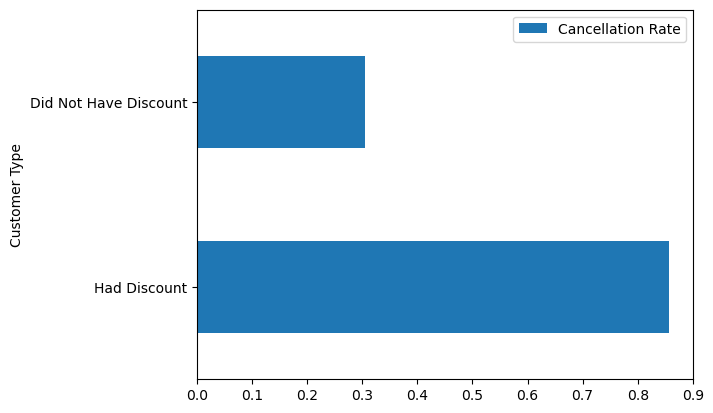

In [78]:
# Visualize the cancellation rate for those with a discount vs those without a discount
pd.DataFrame([['Had Discount', 0.8571428571428571],
             ['Did Not Have Discount', 0.30434782608695654]],
             columns=['Customer Type', 'Cancellation Rate']).plot.barh(x='Customer Type', y='Cancellation Rate', );

Better understand the customers' listening histories:
* Join together the listening history and audio tables
* How many listening sessions did each customer have in the past 3 months?
* What were the most popular genres that customers listened to?

In [79]:
customer_data.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT,0
1,5002,Aria Keys,melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT,0
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01,1
3,5267,Rock Bassett,groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT,0
4,5338,Rhythm Dixon,beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT,0


In [80]:
listening_history.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song
2,5001,100520,3,103,Song
3,5001,100520,4,104,Song
4,5001,100520,5,105,Song


In [81]:
audio.head()

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1
1,Song-102,Unbreakable Beat,Pop,2
2,Song-103,Sunset Boulevard,Pop,5
3,Song-104,Glowing Hearts,Pop,10
4,Song-105,Pop Rocks,Pop,52


In [82]:
sessions.head()

,Session ID,Session Log In Time
0,100520,2023-03-13 18:29:00
1,100522,2023-03-13 22:15:00
2,100525,2023-03-14 10:01:00
3,100527,2023-03-13 14:14:00
4,100538,2023-03-21 12:23:00


In [83]:
# Split the ID in the audio data so the column can be joined with other tables
audio_clean = pd.DataFrame(audio.ID.str.split('-').to_list()).rename(columns={0:'Type', 1:'Audio ID'})
audio_clean.head()


,Type,Audio ID
0,Song,101
1,Song,102
2,Song,103
3,Song,104
4,Song,105


In [84]:
# Add the new fields to the original audio table
audio_all = pd.concat([audio_clean, audio], axis=1)
audio_all.head()

,Type,Audio ID,ID,Name,Genre,Popularity
0,Song,101,Song-101,Dance All Night,Pop,1
1,Song,102,Song-102,Unbreakable Beat,Pop,2
2,Song,103,Song-103,Sunset Boulevard,Pop,5
3,Song,104,Song-104,Glowing Hearts,Pop,10
4,Song,105,Song-105,Pop Rocks,Pop,52


In [85]:
listening_history.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song
2,5001,100520,3,103,Song
3,5001,100520,4,104,Song
4,5001,100520,5,105,Song


In [86]:
# Hint: Check the data type of Audio ID in the audio table
audio_all.dtypes


Type          object
Audio ID      object
ID            object
Name          object
Genre         object
Popularity     int64
dtype: object

In [87]:
# Change Audio ID to an int type instead of an object
audio_all['Audio ID'] = audio_all['Audio ID'].astype('int')
audio_all.head()

,Type,Audio ID,ID,Name,Genre,Popularity
0,Song,101,Song-101,Dance All Night,Pop,1
1,Song,102,Song-102,Unbreakable Beat,Pop,2
2,Song,103,Song-103,Sunset Boulevard,Pop,5
3,Song,104,Song-104,Glowing Hearts,Pop,10
4,Song,105,Song-105,Pop Rocks,Pop,52


In [88]:
# Try the merge again
df = listening_history.merge(audio_all, how='left', on='Audio ID')


In [89]:
df.groupby('Customer ID')['Session ID'].nunique()

Customer ID
5001    8
5002    4
5004    1
5267    7
5338    4
5404    1
5581    3
5759    2
5761    3
5763    6
5826    3
5827    1
6029    2
6092    3
6163    3
6229    2
6406    3
6584    2
6586    2
6588    3
6821    2
6822    3
6824    4
7087    3
7158    3
7224    4
7401    3
7579    2
7581    2
7583    1
Name: Session ID, dtype: int64

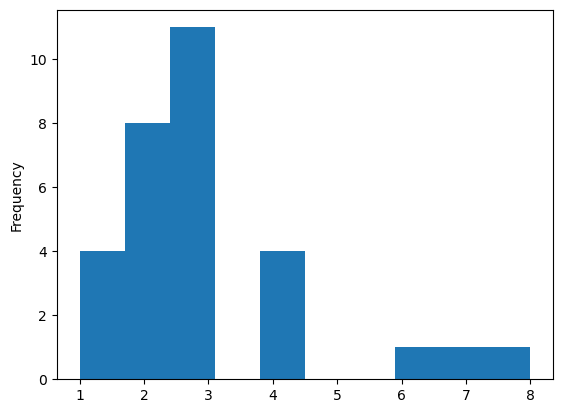

In [90]:
# The number of listening sessions that each customer had in the past 3 months
df.groupby('Customer ID')['Session ID'].nunique().plot.hist();


In [91]:
# The most popular genres that customers listened to
df.Genre.value_counts()

Pop           267
Hip Hop        88
Country        68
Jazz           48
Comedy         19
True Crime     15
Name: Genre, dtype: int64

## 5. Prep for Modeling

Create a DataFrame that is ready for modeling with each row representing a customer and the following numeric, non-null columns:
* Customer ID
* Whether a customer cancelled or not
* Whether a customer received a discount or not
* The number of listening sessions
* Percent of listening history consisting of Pop
* Percent of listening history consisting of Podcasts

In [92]:
# Create a dataframe ready for modeling
model_df = customer_data[['Customer ID', 'Cancelled', 'Discount?']]
model_df.head()

,Customer ID,Cancelled,Discount?
0,5001,0,0
1,5002,0,0
2,5004,1,0
3,5267,0,0
4,5338,0,0


In [93]:
df.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type,Type,ID,Name,Genre,Popularity
0,5001,100520,1,101,Song,Song,Song-101,Dance All Night,Pop,1
1,5001,100520,2,102,Song,Song,Song-102,Unbreakable Beat,Pop,2
2,5001,100520,3,103,Song,Song,Song-103,Sunset Boulevard,Pop,5
3,5001,100520,4,104,Song,Song,Song-104,Glowing Hearts,Pop,10
4,5001,100520,5,105,Song,Song,Song-105,Pop Rocks,Pop,52


In [94]:
df.groupby('Customer ID')['Session ID'].nunique()

Customer ID
5001    8
5002    4
5004    1
5267    7
5338    4
5404    1
5581    3
5759    2
5761    3
5763    6
5826    3
5827    1
6029    2
6092    3
6163    3
6229    2
6406    3
6584    2
6586    2
6588    3
6821    2
6822    3
6824    4
7087    3
7158    3
7224    4
7401    3
7579    2
7581    2
7583    1
Name: Session ID, dtype: int64

In [ ]:
# Add it to the modeling dataframe
model_df = model_df.merge(number_of_sessions, how='left', on='Customer ID')
model_df.head()

In [95]:
# Calculate the number of listening sessions for each customer
number_of_sessions = df.groupby('Customer ID')['Session ID'].nunique().rename('Number of Sessions').to_frame().reset_index()
number_of_sessions.head()

,Customer ID,Number of Sessions
0,5001,8
1,5002,4
2,5004,1
3,5267,7
4,5338,4


In [96]:
df.Genre

0          Pop
1          Pop
2          Pop
3          Pop
4          Pop
        ...   
500       Jazz
501     Comedy
502    Hip Hop
503    Hip Hop
504    Hip Hop
Name: Genre, Length: 505, dtype: object

In [97]:
# Calculate dummy variables for each genre
pd.get_dummies(df.Genre)

,Comedy,Country,Hip Hop,Jazz,Pop,True Crime
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0
...,...,...,...,...,...,...
500,0,0,0,1,0,0
501,1,0,0,0,0,0
502,0,0,1,0,0,0
503,0,0,1,0,0,0


In [98]:
# Combine it with the customer ID
pd.concat([df['Customer ID'], pd.get_dummies(df.Genre)], axis=1)

,Customer ID,Comedy,Country,Hip Hop,Jazz,Pop,True Crime
0,5001,0,0,0,0,1,0
1,5001,0,0,0,0,1,0
2,5001,0,0,0,0,1,0
3,5001,0,0,0,0,1,0
4,5001,0,0,0,0,1,0
...,...,...,...,...,...,...,...
500,7579,0,0,0,1,0,0
501,6588,1,0,0,0,0,0
502,5763,0,0,1,0,0,0
503,5763,0,0,1,0,0,0


In [99]:
# Group it by customer
genres = pd.concat([df['Customer ID'], pd.get_dummies(df.Genre)], axis=1).groupby('Customer ID').sum().reset_index()
genres.head()

,Customer ID,Comedy,Country,Hip Hop,Jazz,Pop,True Crime
0,5001,0,0,26,0,34,0
1,5002,0,22,0,0,0,0
2,5004,0,0,0,0,9,0
3,5267,0,0,22,0,23,0
4,5338,0,18,0,0,0,0


In [100]:
listening_history.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song
2,5001,100520,3,103,Song
3,5001,100520,4,104,Song
4,5001,100520,5,105,Song


In [101]:
# Add a column for total songs / podcasts listened to
total_audio = listening_history.groupby('Customer ID')['Audio ID'].count().rename('Total Audio').to_frame().reset_index()
total_audio.head()

,Customer ID,Total Audio
0,5001,60
1,5002,22
2,5004,9
3,5267,45
4,5338,18


In [102]:
# Create a master audio table to calculate percentages
df_audio = genres.merge(total_audio, how='left', on='Customer ID')
df_audio

,Customer ID,Comedy,Country,Hip Hop,Jazz,Pop,True Crime,Total Audio
0,5001,0,0,26,0,34,0,60
1,5002,0,22,0,0,0,0,22
2,5004,0,0,0,0,9,0,9
3,5267,0,0,22,0,23,0,45
4,5338,0,18,0,0,0,0,18
5,5404,0,0,0,0,8,0,8
6,5581,0,0,0,0,0,5,5
7,5759,0,0,0,0,15,0,15
8,5761,0,0,0,0,0,5,5
9,5763,0,0,11,0,20,0,31


In [109]:
# Percent podcasts
model_df['Percent Podcasts'] = ((df_audio['Comedy'] + df_audio['True Crime']) / df_audio['Total Audio']) * 100
model_df.head()



,Customer ID,Cancelled,Discount?,Percent Pop,Percent Podcasts
0,5001,0,0,56.666667,0.0
1,5002,0,0,0.000000,0.0
2,5004,1,0,100.000000,0.0
3,5267,0,0,51.111111,0.0
4,5338,0,0,0.000000,0.0


In [110]:
# Percent podcasts
model_df['Percent Podcasts'] = ((df_audio['Comedy'] + df_audio['True Crime']) / df_audio['Total Audio']) * 100
model_df.head()



,Customer ID,Cancelled,Discount?,Percent Pop,Percent Podcasts
0,5001,0,0,56.666667,0.0
1,5002,0,0,0.000000,0.0
2,5004,1,0,100.000000,0.0
3,5267,0,0,51.111111,0.0
4,5338,0,0,0.000000,0.0


In [111]:
model_df

,Customer ID,Cancelled,Discount?,Percent Pop,Percent Podcasts
0,5001,0,0,56.666667,0.000000
1,5002,0,0,0.000000,0.000000
2,5004,1,0,100.000000,0.000000
3,5267,0,0,51.111111,0.000000
4,5338,0,0,0.000000,0.000000
5,5404,1,0,100.000000,0.000000
6,5581,0,0,0.000000,100.000000
7,5759,1,0,100.000000,0.000000
8,5761,0,0,0.000000,100.000000
9,5763,0,0,64.516129,0.000000


Visualize the relationships in the modeling DataFrame using a pair plot:
* What are some of your observations?
* What variables might do a good job predicting customer cancellation?

In [112]:
model_df

,Customer ID,Cancelled,Discount?,Percent Pop,Percent Podcasts
0,5001,0,0,56.666667,0.000000
1,5002,0,0,0.000000,0.000000
2,5004,1,0,100.000000,0.000000
3,5267,0,0,51.111111,0.000000
4,5338,0,0,0.000000,0.000000
5,5404,1,0,100.000000,0.000000
6,5581,0,0,0.000000,100.000000
7,5759,1,0,100.000000,0.000000
8,5761,0,0,0.000000,100.000000
9,5763,0,0,64.516129,0.000000


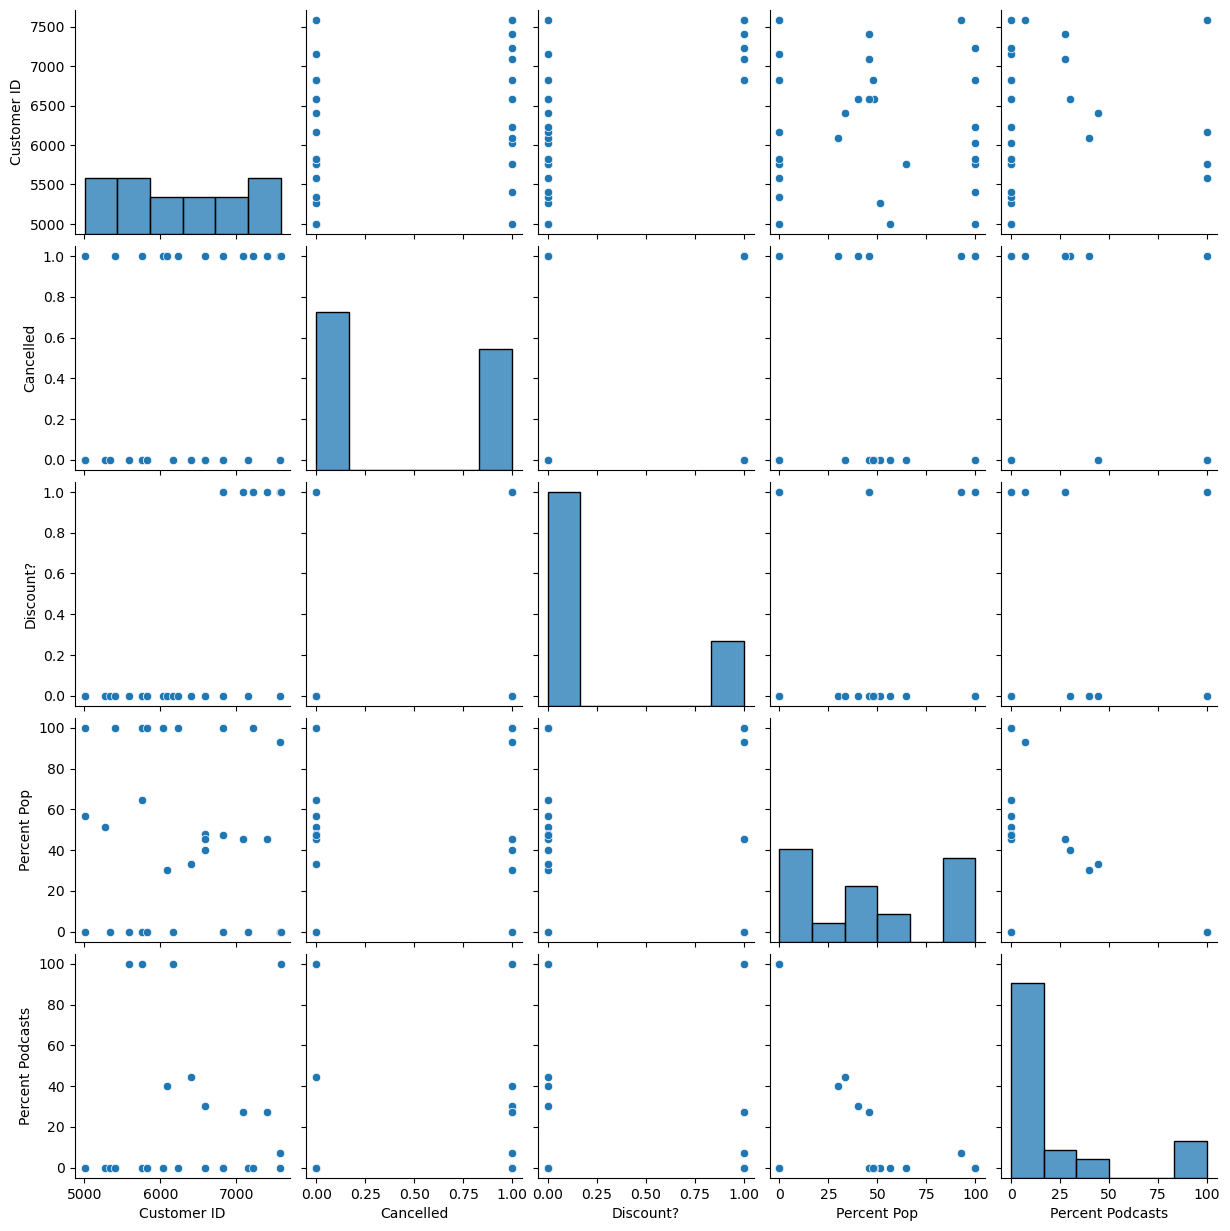

In [113]:
import seaborn as sns
sns.pairplot(model_df);

In [114]:
# Look at the correlations
model_df.corr()

,Customer ID,Cancelled,Discount?,Percent Pop,Percent Podcasts
Customer ID,1.000000,0.269942,0.648514,-0.076129,0.083083
Cancelled,0.269942,1.000000,0.471825,0.585630,-0.035414
Discount?,0.648514,0.471825,1.000000,0.112675,0.062938
Percent Pop,-0.076129,0.585630,0.112675,1.000000,-0.487193
Percent Podcasts,0.083083,-0.035414,0.062938,-0.487193,1.000000
